# Test Retina display figures

In [10]:
import matplotlib
print(matplotlib.get_backend())
import matplotlib.pyplot as plt
import numpy as np

module://ipykernel.pylab.backend_inline


In [11]:
%matplotlib inline

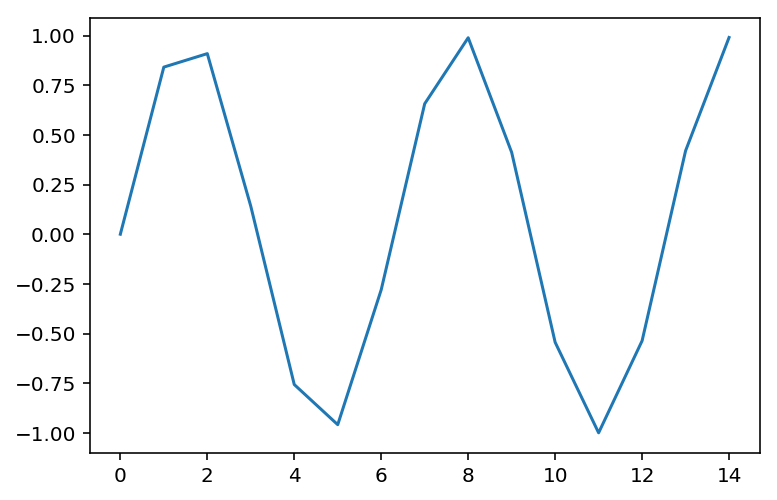

In [12]:
plt.plot(np.sin(np.arange(15)))
plt.savefig('nonretina.pdf')

In [13]:
# Try PNG Image (SRTM 30m Shaded Relief)
im = plt.imread('N46W122.utm.shade.png').astype('f4')
im = im[0:1000, 0:1000]

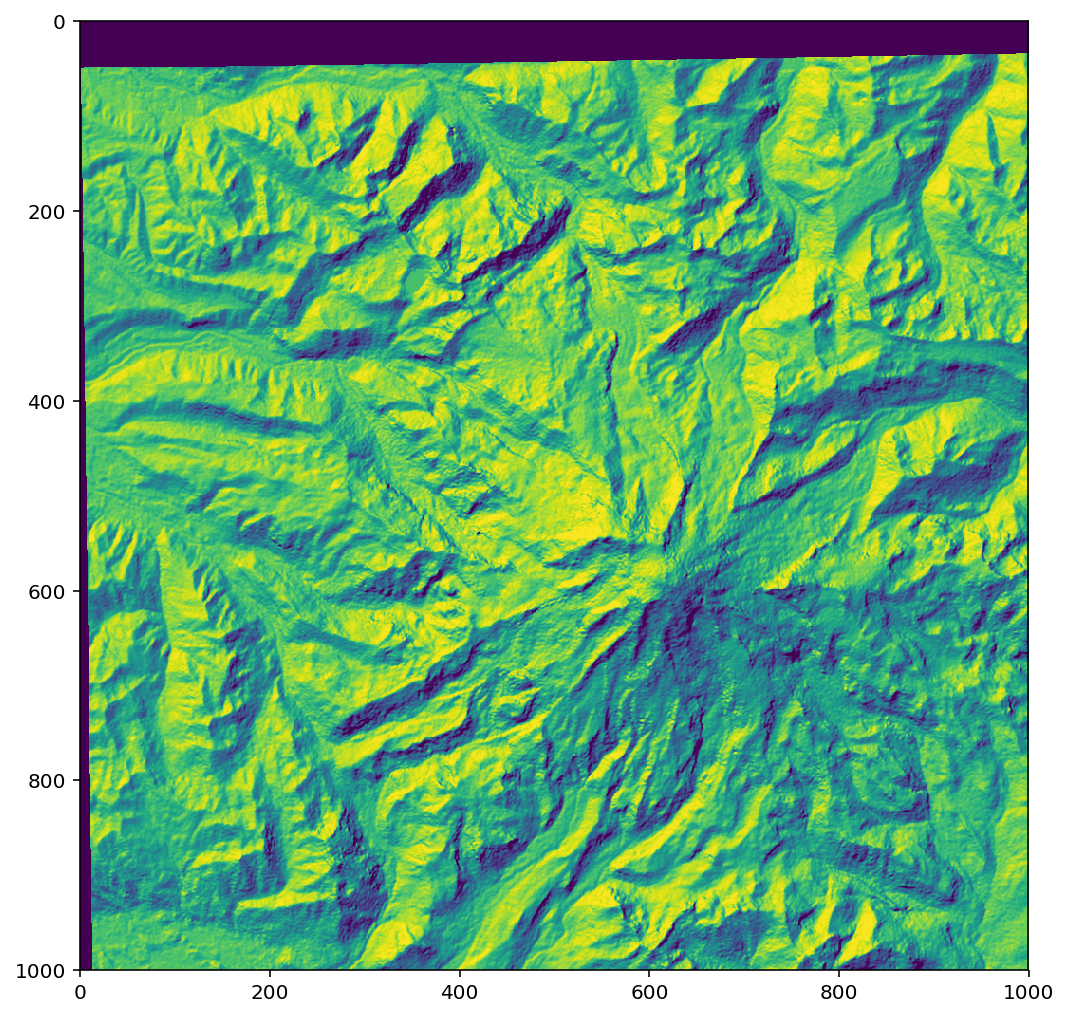

In [14]:
plt.figure(figsize=(8.5,11))
plt.imshow(im)

# Note: the graphs are identical when saved, but look better in the browser with the %config command

In [15]:
%config InlineBackend.figure_format = 'retina'

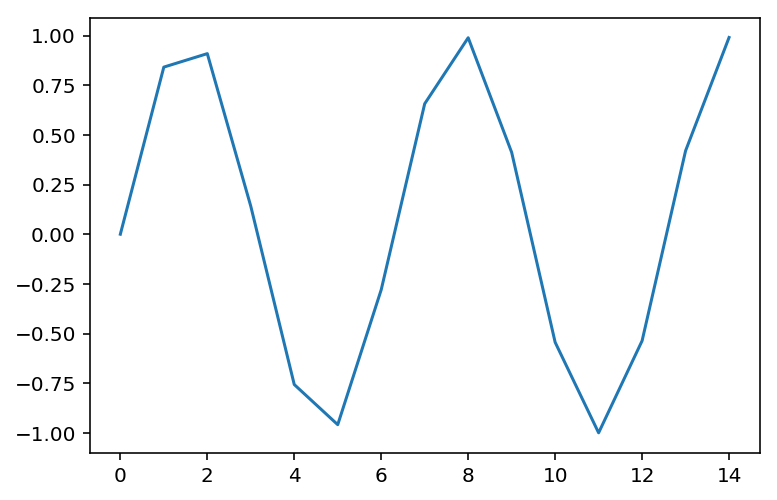

In [16]:
plt.plot(np.sin(np.arange(15)))
plt.savefig('retina.pdf')

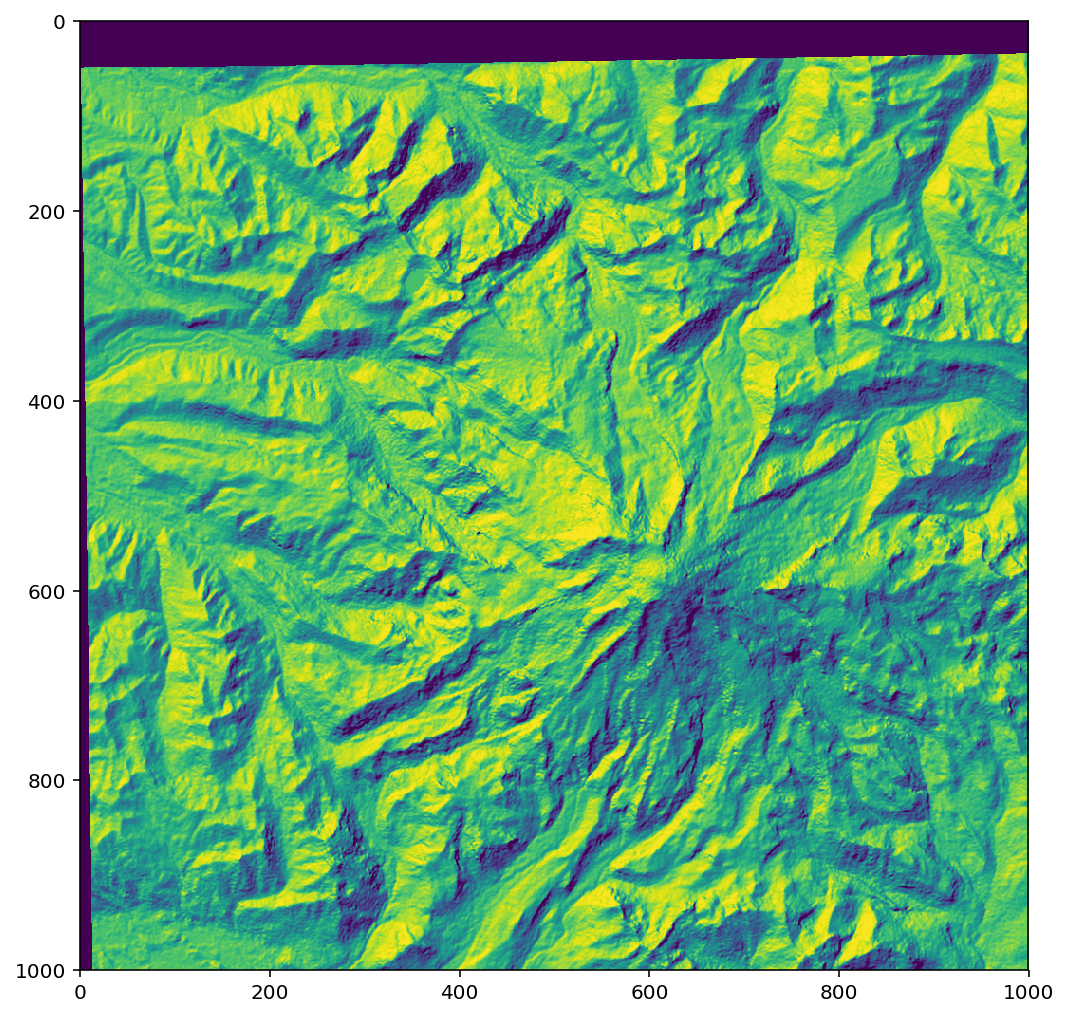

In [17]:
plt.figure(figsize=(8.5,11))
plt.imshow(im)

# Animations!


In [18]:
from matplotlib import animation, rc
from IPython.display import HTML

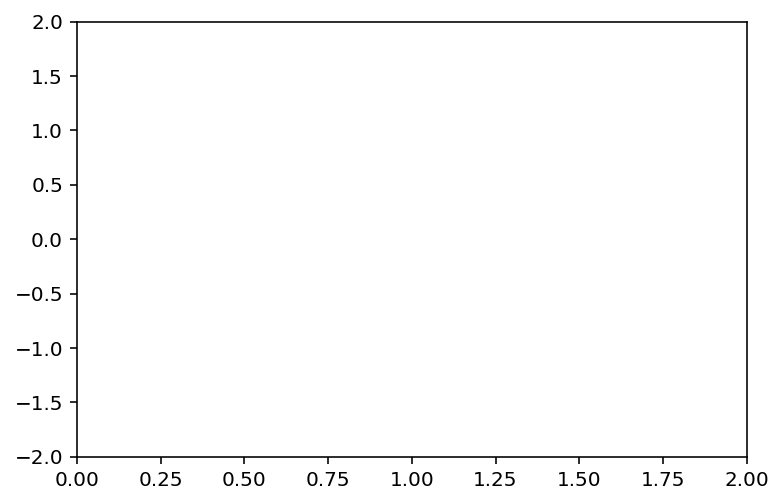

In [27]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=4, alpha=0.5)

In [28]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [29]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [30]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)


In [31]:
plt.rc('animation', html='html5')

In [32]:
# NOTE: requires ffmeg installed
anim

In [33]:
anim.save('test_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])